In [2]:
import sys
import os
sys.path.append(os.path.abspath('..')) #поднимаемся на одну директорию вверх

In [3]:
import torch
import torch.nn as nn
from src.model import FashionCNN
from src.data import get_dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
_, _, test_loader = get_dataloaders(batch_size=64)  # train И val не нужен

In [5]:
model = FashionCNN().to(device)
model.load_state_dict(torch.load("../models/fashion_cnn.pth"))

<All keys matched successfully>

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
model.eval()#Переходим в режим проверки
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():#Режим без вычисления градиентов(донастройки модели)
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_loss = test_loss / len(test_loader)
accuracy = correct / total * 100

print(f" Test Loss: {avg_loss:.4f}")
print(f" Test Accuracy: {accuracy:.2f}%")

 Test Loss: 0.3027
 Test Accuracy: 91.54%


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

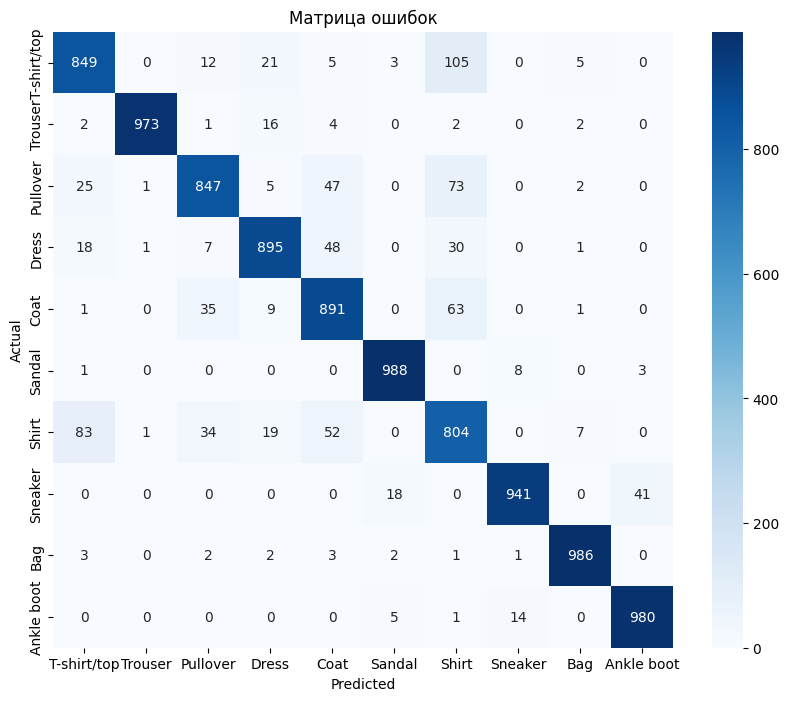

In [13]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels = test_loader.dataset.classes,
            yticklabels = test_loader.dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Матрица ошибок")
plt.show()
            